In [57]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [58]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias
    #pass
  
  def forward(self, inputs):
    return torch.sum(self.weights*inputs) + self.bias


In [59]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [60]:
neuron = Neuron(weights, bias)

res = neuron.forward(inputs)
res

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [61]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    #pass
  
  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

In [62]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [63]:
linear = Linear(weights, biases)
res = linear.forward(inputs)
res

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [64]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [65]:
res = linear.forward(inputs)
res

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [66]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.n_features = n_features
    self.n_neurons = n_neurons
    self.weights = torch.randn(self.n_features, self.n_neurons)
    self.biases = torch.randn(self.n_neurons)
    pass
  
  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

In [67]:
linear = Linear(4, 3)
linear.forward(inputs)

tensor([[ 7.4480, -7.6263, -3.9996],
        [ 1.9561, -3.0633,  7.5167],
        [ 6.7407, -5.9585, -2.9321]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [68]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear_1 = Linear(4, 3)
linear_2 = Linear(3, 7)

linear_2.forward(linear_1.forward(inputs))

tensor([[ 10.2869,  -3.2214, -22.4748,  -0.4092,   3.2763,   2.3454, -12.0536],
        [ -3.7339,   7.6144, -29.1645,   6.5017,   5.1719,  -8.4754, -20.5138],
        [ 13.1298,  -8.0536, -22.1801,  -5.3535,   4.4896,   5.5810, -10.8227]])

  ## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [69]:
class ReLU:
  def forward(self, inputs):
    mask = inputs < 0
    inputs[mask] = 0
    return inputs

In [70]:
relu = ReLU()
matr = torch.randn((4, 3))
res = relu.forward(matr)
print(res)

tensor([[0.5099, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0916],
        [0.0000, 0.6817, 0.0000],
        [0.0000, 0.0000, 0.0000]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [71]:
class Softmax_c:
  def forward(self, inputs):
    matr = torch.exp(inputs)
    return matr/torch.sum(inputs, dim=1).view(-1,1)

In [72]:
sf = Softmax_c()
matr = torch.randn((4, 3))
res = sf.forward(matr)
print(res)

tensor([[-0.0708, -0.6321, -1.1228],
        [ 1.9079,  0.7953,  1.3678],
        [ 0.2801,  7.0423,  0.4683],
        [-0.4616, -3.1353, -0.2841]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [73]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha
    pass

  def forward(self, inputs):
    inputs[inputs < 0] = (torch.exp(inputs[inputs < 0]) - 1) * self.alpha
    return inputs

In [74]:
elu = ELU(alpha = 1)
matr = torch.randn((4, 3))
print("Input:\n", matr)

res = elu.forward(matr)
print("Output:\n", res)

Input:
 tensor([[ 1.3043, -0.5171,  0.9703],
        [-0.5270,  0.7532, -0.8889],
        [ 0.4921, -0.0425,  0.0938],
        [ 1.1673,  1.6898,  1.9701]])
Output:
 tensor([[ 1.3043, -0.4038,  0.9703],
        [-0.4096,  0.7532, -0.5889],
        [ 0.4921, -0.0416,  0.0938],
        [ 1.1673,  1.6898,  1.9701]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [75]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_true - y_pred) ** 2).mean()

In [76]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [77]:
linear_layer = Linear(4, 1)

mse_loss = MSELoss()
res = mse_loss.forward(linear_layer.forward(inputs), y)
print(res)

tensor(181.3054)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [78]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    return -1 * (y_true * torch.log(y_pred)).sum(1)
    pass

In [79]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [80]:
linear_layer = Linear(4, 3) #Слой с 3 нейронами

softmax = Softmax_c()
cce_loss = CategoricalCrossentropyLoss()
res = cce_loss.forward(softmax.forward(linear_layer.forward(inputs)), y)
print(res)

tensor([nan, nan, nan])


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [81]:
class MSELossL2:
    def __init__(self, lambda_, layer, W=0.1):
        self.lambda_ = lambda_
        self.layer = layer
        self.layer.W = W

    def data_loss(self, y_pred, y_true):
        return (y_true - y_pred) ** 2

    def reg_loss(self, layer):
        return self.lambda_ * (layer.W ** 2)

    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss(self.layer)

In [82]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3)
layer_out = linear_layer.forward(inputs)

softmax = Softmax_c()
mse_loss = MSELossL2(1.5, linear_layer)
res = mse_loss.forward(softmax.forward(layer_out), y)
print(res)

tensor([[1.0436e+04, 1.1845e+04, 2.4362e-02],
        [7.3942e-01, 3.8767e+05, 1.6012e-02],
        [2.2021e+07, 8.4568e+03, 1.5002e-02]])


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [83]:
import sklearn

In [84]:
from sklearn.datasets import make_regression

In [85]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=0)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
y

tensor([[ -41.2726],
        [   4.2447],
        [ -95.1568],
        [ -24.5819],
        [  27.9462],
        [ -31.4934],
        [  55.9900],
        [-101.7946],
        [ -41.9318],
        [ 109.7482],
        [-115.0168],
        [ 102.2581],
        [ -64.1279],
        [ -29.8171],
        [-148.6656],
        [ -62.5905],
        [-111.8847],
        [-159.5456],
        [  23.4118],
        [  -7.6453],
        [  44.3271],
        [ 121.3781],
        [ 153.8689],
        [ 105.6647],
        [ -96.1774],
        [ -28.9994],
        [ 296.4494],
        [ -68.7938],
        [  52.0599],
        [  79.6068],
        [ 125.9714],
        [   2.0849],
        [  10.4737],
        [ 124.3630],
        [-150.6220],
        [  92.3236],
        [  -5.9085],
        [ 125.8456],
        [-199.2208],
        [-292.7495],
        [ 107.8483],
        [ -19.9285],
        [ 100.5492],
        [  94.9820],
        [-111.5261],
        [ -35.7181],
        [ 118.0920],
        [-219

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [86]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [87]:
class Neuron:
  def __init__(self, n_inputs: int):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, inputs):
    self.inputs = inputs
    return (self.inputs * self.weights).sum() + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    # df/dW
    self.dweights = dvalue * self.inputs
    # df/wX
    self.dinput =  dvalue * self.weights
    # df/db
    self.dbias = dvalue


In [88]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])

naive_neuron = Neuron(4)
out = naive_neuron.forward(inputs)
print(out)

tensor([-2.6075])


2.4.1.3 Допишите цикл для настройки весов нейрона

In [89]:
n_inputs = X.shape[1] # <размерность элемента выборки >
print(n_inputs)
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # нейрон
    y_pred =  neuron.forward(x_example)
    # функция потерь
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    # обратите внимание на последовательность вызовов: от конца к началу
    #backward
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
losses[::20]

4


[tensor([1759.5232]),
 tensor([366.9762]),
 tensor([1.5075]),
 tensor([1.3133e-07]),
 tensor([3.5225e-06]),
 tensor([2.9467e-05]),
 tensor([1.3894e-06]),
 tensor([6.7288e-08]),
 tensor([3.6380e-12]),
 tensor([1.4552e-11]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tens

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [90]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [91]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(1, n_inputs).T
    self.bias = torch.randn(1)
  
  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dinputs = torch.matmul(dvalue, self.weights.T)
    self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
    self.dbias = torch.sum(dvalue) # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [92]:
n_inputs = X.shape[1] # размерность
learning_rate = 0.01 #  скорость
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X) # нейрон
    curr_loss = loss.forward(y_pred, y) #функция потерь
    losses.append(curr_loss)


    #backward
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

losses[::20]

[tensor(14125.1660),
 tensor(6021.0229),
 tensor(2616.8210),
 tensor(1162.7518),
 tensor(529.6871),
 tensor(248.0118),
 tensor(119.5828),
 tensor(59.4280),
 tensor(30.4281),
 tensor(16.0258),
 tensor(8.6592),
 tensor(4.7844),
 tensor(2.6937),
 tensor(1.5403),
 tensor(0.8917),
 tensor(0.5214),
 tensor(0.3072),
 tensor(0.1821),
 tensor(0.1084),
 tensor(0.0648),
 tensor(0.0389),
 tensor(0.0234),
 tensor(0.0141),
 tensor(0.0085),
 tensor(0.0051),
 tensor(0.0031),
 tensor(0.0019),
 tensor(0.0011),
 tensor(0.0007),
 tensor(0.0004),
 tensor(0.0003),
 tensor(0.0002),
 tensor(9.2458e-05),
 tensor(5.6070e-05),
 tensor(3.3973e-05),
 tensor(2.0628e-05),
 tensor(1.2564e-05),
 tensor(7.5633e-06),
 tensor(4.5883e-06),
 tensor(2.8282e-06),
 tensor(1.7620e-06),
 tensor(1.0844e-06),
 tensor(6.9297e-07),
 tensor(4.7499e-07),
 tensor(3.0810e-07),
 tensor(1.8307e-07),
 tensor(1.2449e-07),
 tensor(1.1550e-07),
 tensor(1.1415e-07),
 tensor(1.1125e-07)]

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [93]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [94]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(14065.9766),
 tensor(6013.9795),
 tensor(2623.0134),
 tensor(1170.2639),
 tensor(535.5695),
 tensor(252.0350),
 tensor(122.1726),
 tensor(61.0436),
 tensor(31.4191),
 tensor(16.6278),
 tensor(9.0230),
 tensor(5.0036),
 tensor(2.8257),
 tensor(1.6197),
 tensor(0.9395),
 tensor(0.5501),
 tensor(0.3245),
 tensor(0.1925),
 tensor(0.1148),
 tensor(0.0686),
 tensor(0.0412),
 tensor(0.0247),
 tensor(0.0149),
 tensor(0.0090),
 tensor(0.0054),
 tensor(0.0033),
 tensor(0.0020),
 tensor(0.0012),
 tensor(0.0007),
 tensor(0.0004),
 tensor(0.0003),
 tensor(0.0002),
 tensor(9.7722e-05),
 tensor(5.9246e-05),
 tensor(3.5887e-05),
 tensor(2.1810e-05),
 tensor(1.3252e-05),
 tensor(8.0215e-06),
 tensor(4.8650e-06),
 tensor(2.9976e-06),
 tensor(1.8700e-06),
 tensor(1.1612e-06),
 tensor(7.2776e-07),
 tensor(4.9286e-07),
 tensor(3.2550e-07),
 tensor(1.9509e-07),
 tensor(1.2945e-07),
 tensor(1.1555e-07),
 tensor(1.1413e-07),
 tensor(1.1121e-07)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [95]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [96]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [99]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(data_loss)
        ys.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

tensor(1.4155)
tensor(0.0338)
tensor(0.0191)
tensor(0.0127)
tensor(0.0105)
tensor(0.0097)
tensor(0.0095)
tensor(0.0095)
tensor(0.0095)
tensor(0.0095)
tensor(0.0095)


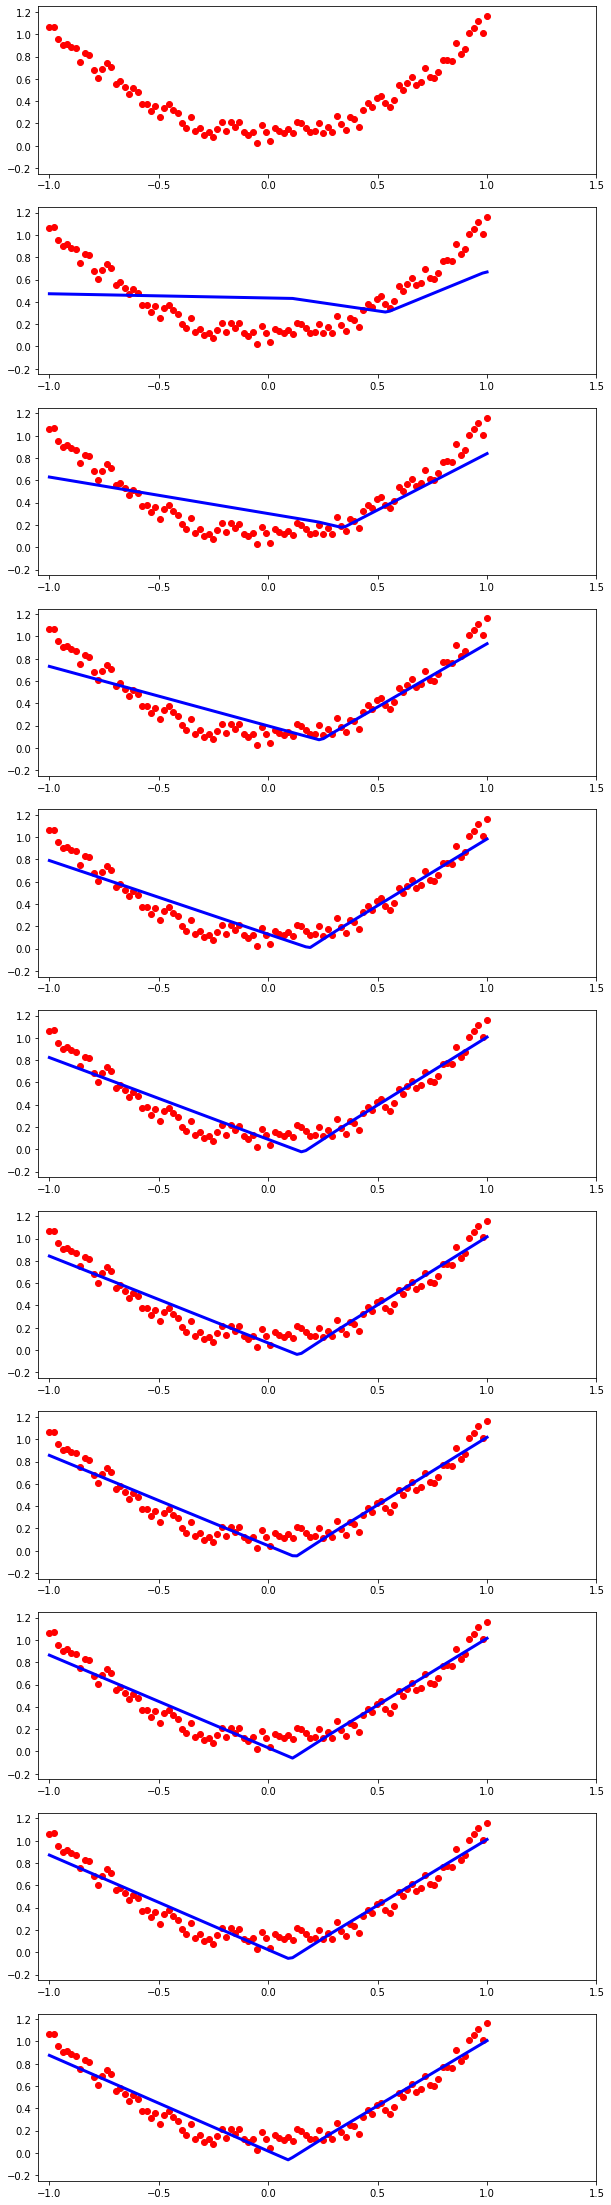

In [98]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="red")
    ax.plot(X.numpy(), y_.numpy(), 'blue', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)